# Analysis of Results
This notebook explores the pairwise relationships between components using data visualizations.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from util_functions import list_subjects, load_file, starting_run, finished_run
import plotly

In [9]:
import chart_studio
chart_studio.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

In [7]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

PlotlyRequestError: Authentication credentials were not provided.

### Notebook Parameters

In [2]:
results_df = load_file('results/component_correlations_df.pickle')

### Splitting of Comparison Data

In [22]:
subdivided_comparison_dict = {
    "Same Subject, Same Stimulus, Same Component Number": results_df[
        (results_df.stimulus_1 == results_df.stimulus_2) & 
        (results_df.subject_1 == results_df.subject_2) &
        (results_df.component_1 == results_df.component_2)
    ],
    "Same Subject, Same Stimulus, Different Component Number": results_df[
        (results_df.stimulus_1 == results_df.stimulus_2) & 
        (results_df.subject_1 == results_df.subject_2) &
        (results_df.component_1 != results_df.component_2)
    ],
    "Same Subject, Different Stimulus, Same Component Number": results_df[
        (results_df.stimulus_1 == results_df.stimulus_2) & 
        (results_df.subject_1 != results_df.subject_2) &
        (results_df.component_1 == results_df.component_2)
    ],
    "Same Subject, Different Stimulus, Different Component Number": results_df[
        (results_df.stimulus_1 == results_df.stimulus_2) & 
        (results_df.subject_1 != results_df.subject_2) &
        (results_df.component_1 != results_df.component_2)
    ],
    "Different Subject, Same Stimulus, Same Component Number": results_df[
        (results_df.stimulus_1 != results_df.stimulus_2) & 
        (results_df.subject_1 == results_df.subject_2) &
        (results_df.component_1 == results_df.component_2)
    ],
    "Different Subject, Same Stimulus, Different Component Number": results_df[
        (results_df.stimulus_1 != results_df.stimulus_2) & 
        (results_df.subject_1 == results_df.subject_2) &
        (results_df.component_1 != results_df.component_2)
    ],
    "Different Subject, Different Stimulus, Same Component Number": results_df[
        (results_df.stimulus_1 != results_df.stimulus_2) & 
        (results_df.subject_1 != results_df.subject_2) &
        (results_df.component_1 == results_df.component_2)
    ],
    "Different Subject, Different Stimulus, Different Component Number": results_df[
        (results_df.stimulus_1 != results_df.stimulus_2) & 
        (results_df.subject_1 != results_df.subject_2) &
        (results_df.component_1 != results_df.component_2)
    ],
    "Same Subject, Same Stimulus": results_df[
        (results_df.stimulus_1 == results_df.stimulus_2) & 
        (results_df.subject_1 == results_df.subject_2)
    ],
    "Same Subject, Different Stimulus": results_df[
        (results_df.stimulus_1 == results_df.stimulus_2) & 
        (results_df.subject_1 != results_df.subject_2)
    ],
    "Different Subject, Same Stimulus": results_df[
        (results_df.stimulus_1 != results_df.stimulus_2) & 
        (results_df.subject_1 == results_df.subject_2)
    ],
    "Different Subject, Different Stimulus": results_df[
        (results_df.stimulus_1 != results_df.stimulus_2) & 
        (results_df.subject_1 != results_df.subject_2)
    ],
    "Same Component Number": results_df[
        results_df.component_1 == results_df.component_2
    ],
    "Different Component Number": results_df[
        results_df.component_1 != results_df.component_2
    ]
}

### Notebook Plotting Functions

In [47]:
def graph_boxplot(data, x_labels, y_axis_label, title, figsize=(20,5), y_scale='linear'):
    fig_1, ax_1 = plt.subplots(figsize=figsize)
    ax_1.set_title(title)
    ax_1.set_ylabel('Comparison Parameters')
    ax_1.set_xlabel(y_axis_label)
    ax_1.set_xscale(y_scale)
    ax_1.boxplot(data, labels=x_labels, vert=False)
    plt.show()

In [ ]:
def graph_scatter(data, )

### Main Code Execution

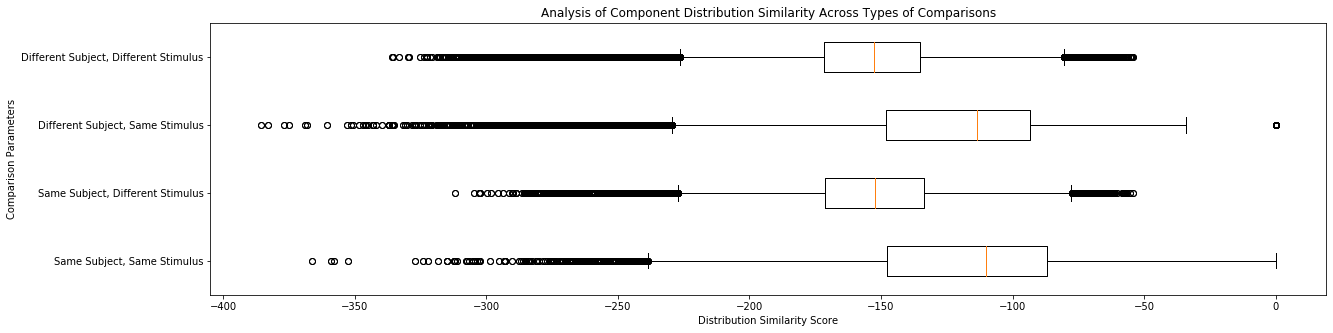

In [48]:
# Geography Boxplot
labels = list(filter(
        lambda key: 'Component' not in key,
        subdivided_comparison_dict.keys()
))
data = list(map(
    lambda key: subdivided_comparison_dict[key].geo_corr,
    labels
))
graph_boxplot(
    data,
    labels,
    "Distribution Similarity Score",
    "Analysis of Component Distribution Similarity Across Types of Comparisons"
)

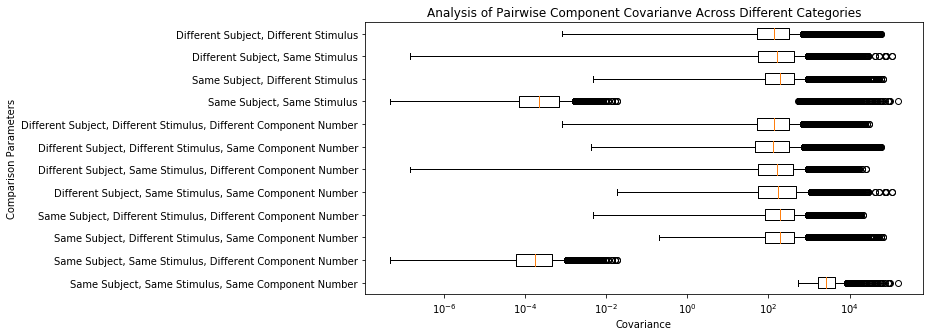

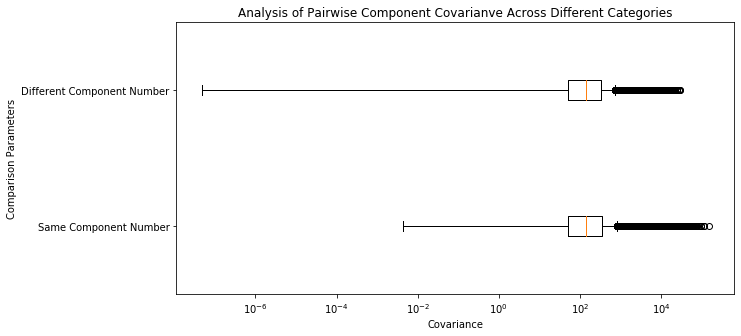

In [49]:
# Covariance Boxplot Between Groups
labels = list(filter(
        lambda key: 'Stimulus' in key,
        subdivided_comparison_dict.keys()
))
data = list(map(
    lambda key: subdivided_comparison_dict[key].covariance,
    labels
))
graph_boxplot(
    data,
    labels,
    "Covariance",
    "Analysis of Pairwise Component Covarianve Across Different Categories",
    figsize=(10,5),
    y_scale='log'
)

# Covariance Boxplot Between Component Number Groups
labels = list(filter(
        lambda key: 'Stimulus' not in key,
        subdivided_comparison_dict.keys()
))
data = list(map(
    lambda key: subdivided_comparison_dict[key].covariance,
    labels
))
graph_boxplot(
    data,
    labels,
    "Covariance",
    "Analysis of Pairwise Component Covarianve Across Different Categories",
    figsize=(10,5),
    y_scale='log'
)

In [50]:
colors=['#00cc00','#cc2900','#99ff99','#ffad99','#66ff66','#ff8566','#33ff33','#ff5c33','#00ff00','#ff3300']
def scatter_geo_cov(scatter, num_plotted, legends, title):
    fig =plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor('black')
    for num in range(0,num_plotted):
        ax.scatter(scatter[num][0],scatter[num][1], c=colors[num], s=.1, label=legends[num])
    ax.legend(loc='upper right')
    ax.set_xlabel('Geographic Correlation')
    ax.set_ylabel('Covariance')
    ax.set_title(title)
    plt.show()
    
    fig =plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor('black')
    for num in range(0,num_plotted):
        ax.scatter(scatter[num][0],scatter[num][1], c=colors[num], s=.1, label=legends[num])
    ax.legend(loc='upper right')
    ax.set_xlabel('Geographic Correlation')
    ax.set_ylabel('Covariance')
    ax.set_title(title)
    ax.set_ylim([-1,2000])
    plt.show()

In [5]:
# creating datasets
within_fish_same_stimulus_same_comp = results_df[
    (results_df.stimulus_1 == results_df.stimulus_2) & 
    (results_df.subject_1 == results_df.subject_2) &
    (results_df.component_1 == results_df.component_2)
]
within_fish_same_stimulus_diff_comp = results_df[
    (results_df.stimulus_1 == results_df.stimulus_2) & 
    (results_df.subject_1 == results_df.subject_2) &
    (results_df.component_1 != results_df.component_2)
]

within_fish_diff_stimulus_same_comp = results_df[
    (results_df.stimulus_1 != results_df.stimulus_2) & 
    (results_df.subject_1 == results_df.subject_2)&
    (results_df.component_1 == results_df.component_2)
]
within_fish_diff_stimulus_diff_comp = results_df[
    (results_df.stimulus_1 != results_df.stimulus_2) & 
    (results_df.subject_1 == results_df.subject_2)&
    (results_df.component_1 != results_df.component_2)
]

across_fish_same_stimulus_same_comp = results_df[
    (results_df.stimulus_1 == results_df.stimulus_2) & 
    (results_df.subject_1 != results_df.subject_2)&
    (results_df.component_1 == results_df.component_2)
]
across_fish_same_stimulus_diff_comp = results_df[
    (results_df.stimulus_1 == results_df.stimulus_2) & 
    (results_df.subject_1 != results_df.subject_2)&
    (results_df.component_1 != results_df.component_2)
]

across_fish_diff_stimulus_same_comp = results_df[
    (results_df.stimulus_1 != results_df.stimulus_2) & 
    (results_df.subject_1 != results_df.subject_2)&
    (results_df.component_1 == results_df.component_2)
]
across_fish_diff_stimulus_diff_comp = results_df[
    (results_df.stimulus_1 != results_df.stimulus_2) & 
    (results_df.subject_1 != results_df.subject_2)&
    (results_df.component_1 != results_df.component_2)
]

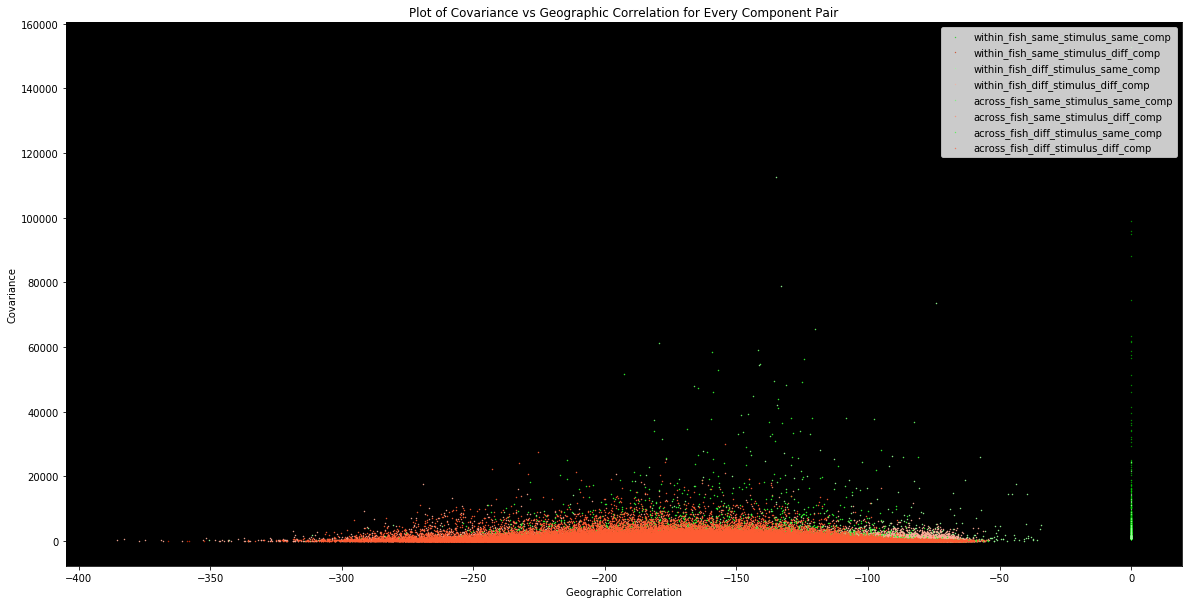

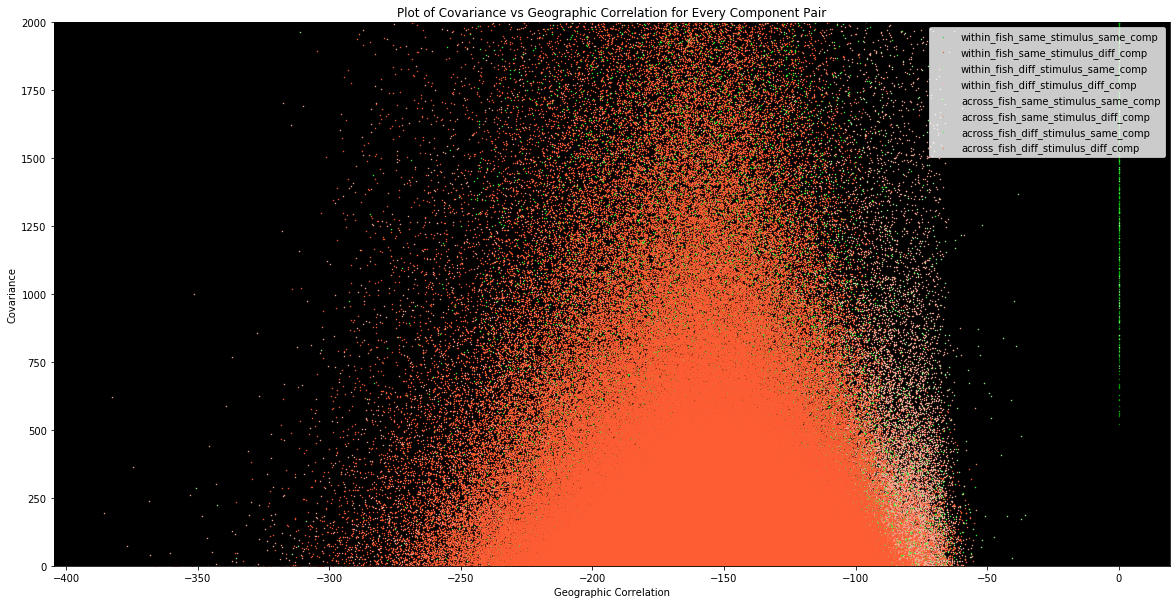

In [6]:
scatter_geo_cov([
    [within_fish_same_stimulus_same_comp.geo_corr,within_fish_same_stimulus_same_comp.covariance],
    [within_fish_same_stimulus_diff_comp.geo_corr,within_fish_same_stimulus_diff_comp.covariance],
    [within_fish_diff_stimulus_same_comp.geo_corr,within_fish_diff_stimulus_same_comp.covariance],
    [within_fish_diff_stimulus_diff_comp.geo_corr,within_fish_diff_stimulus_diff_comp.covariance],
    [across_fish_same_stimulus_same_comp.geo_corr,across_fish_same_stimulus_same_comp.covariance],
    [across_fish_same_stimulus_diff_comp.geo_corr,across_fish_same_stimulus_diff_comp.covariance],
    [across_fish_diff_stimulus_same_comp.geo_corr,across_fish_diff_stimulus_same_comp.covariance],
    [across_fish_diff_stimulus_diff_comp.geo_corr,across_fish_diff_stimulus_diff_comp.covariance]
], 8, [
    'within_fish_same_stimulus_same_comp',
    'within_fish_same_stimulus_diff_comp',
    'within_fish_diff_stimulus_same_comp',
    'within_fish_diff_stimulus_diff_comp',
    'across_fish_same_stimulus_same_comp',
    'across_fish_same_stimulus_diff_comp',
    'across_fish_diff_stimulus_same_comp',
    'across_fish_diff_stimulus_diff_comp'
    
], 'Plot of Covariance vs Geographic Correlation for Every Component Pair')

In [7]:
print(stats.spearmanr(within_fish_same_stimulus_same_comp.geo_corr,within_fish_same_stimulus_same_comp.covariance))
print(stats.spearmanr(within_fish_same_stimulus_diff_comp.geo_corr,within_fish_same_stimulus_diff_comp.covariance))
print(stats.spearmanr(within_fish_diff_stimulus_same_comp.geo_corr,within_fish_diff_stimulus_same_comp.covariance))
print(stats.spearmanr(within_fish_diff_stimulus_diff_comp.geo_corr,within_fish_diff_stimulus_diff_comp.covariance))
print(stats.spearmanr(across_fish_same_stimulus_same_comp.geo_corr,across_fish_same_stimulus_same_comp.covariance))
print(stats.spearmanr(across_fish_same_stimulus_diff_comp.geo_corr,across_fish_same_stimulus_diff_comp.covariance))
print(stats.spearmanr(across_fish_diff_stimulus_same_comp.geo_corr,across_fish_diff_stimulus_same_comp.covariance))
print(stats.spearmanr(across_fish_diff_stimulus_diff_comp.geo_corr,across_fish_diff_stimulus_diff_comp.covariance))

SpearmanrResult(correlation=0.06546263821103279, pvalue=0.025776325701991808)
SpearmanrResult(correlation=0.22152560077458824, pvalue=3.12686754306741e-116)
SpearmanrResult(correlation=0.0006509474010927055, pvalue=0.9432534350056396)
SpearmanrResult(correlation=-0.06899341200727144, pvalue=1.0511307988511573e-113)
SpearmanrResult(correlation=-0.0844550677464653, pvalue=2.7865761998960084e-19)
SpearmanrResult(correlation=-0.11325383821898827, pvalue=1.8614804434788173e-286)
SpearmanrResult(correlation=-0.1021032545031128, pvalue=0.0)
SpearmanrResult(correlation=-0.10782568305022763, pvalue=0.0)


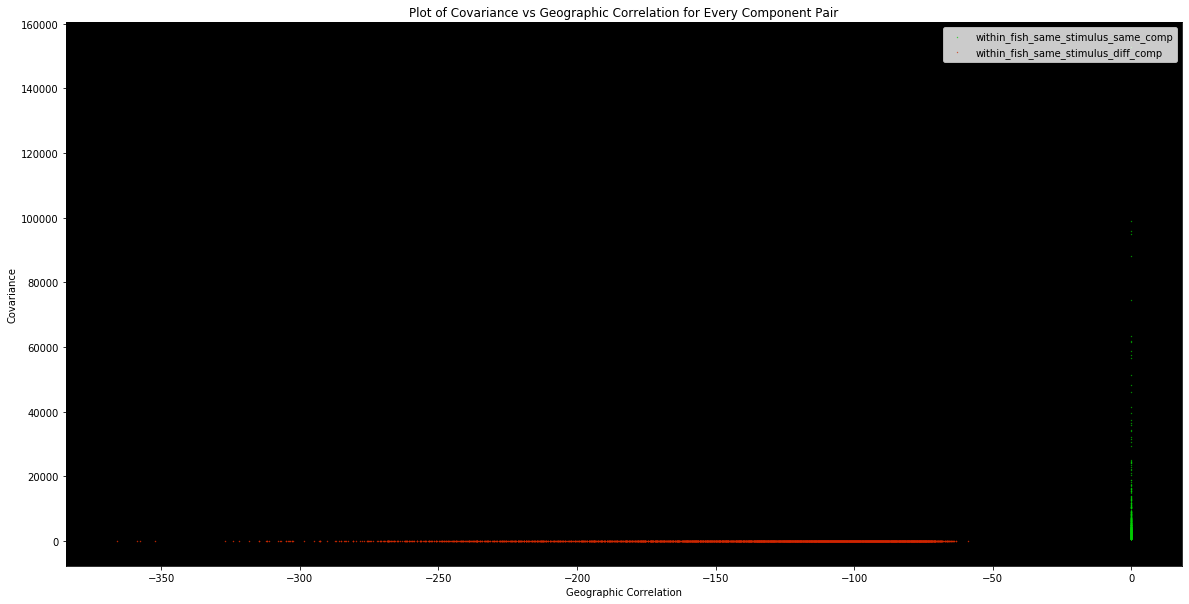

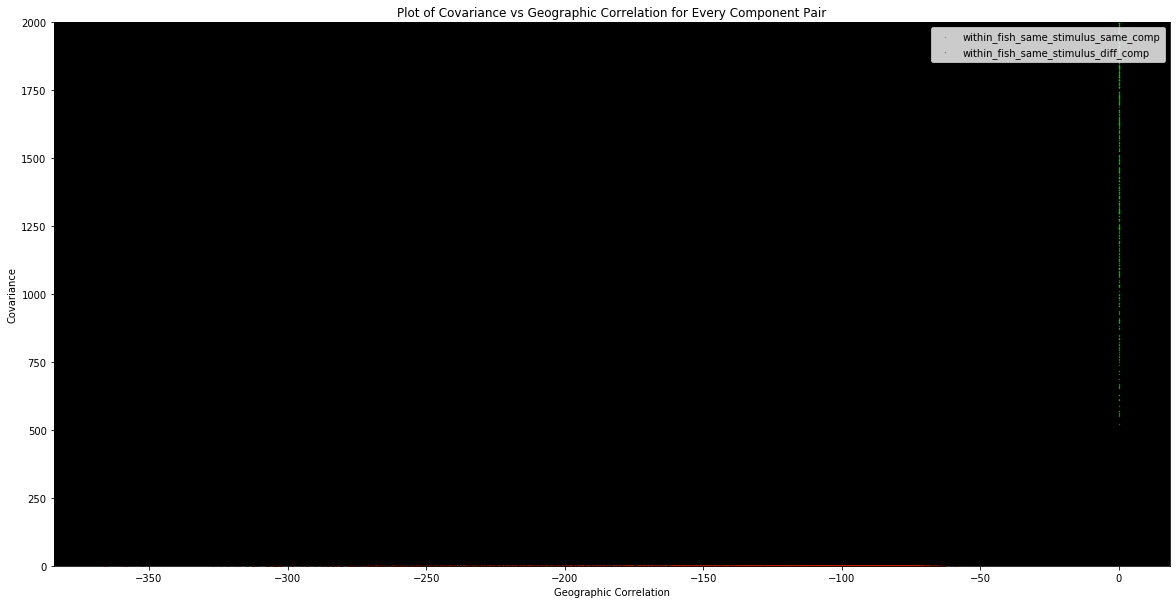

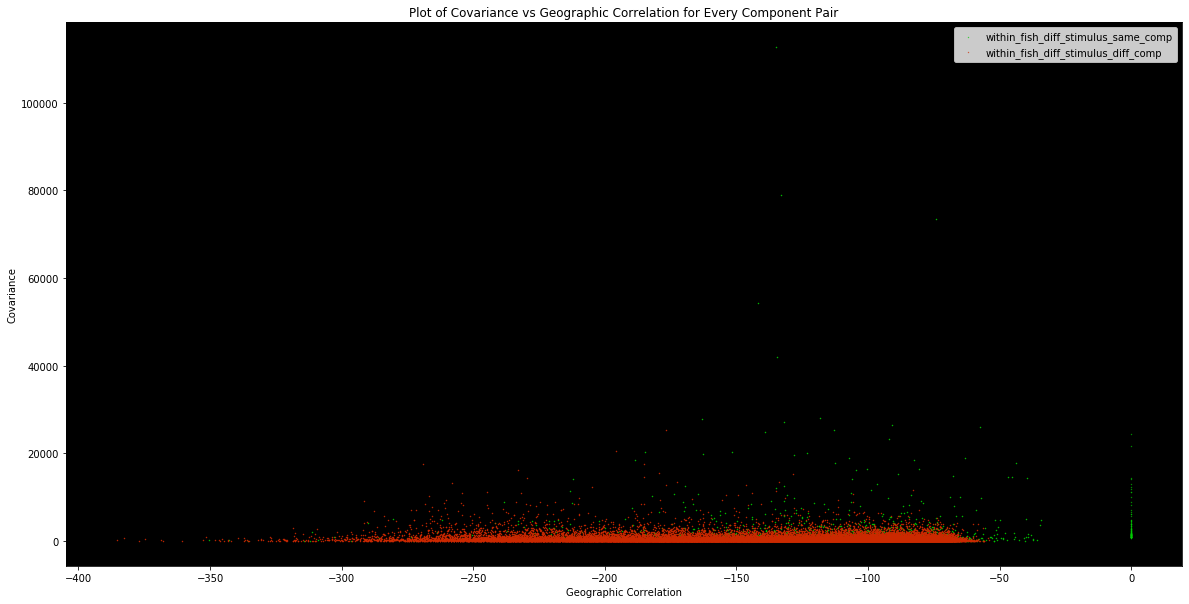

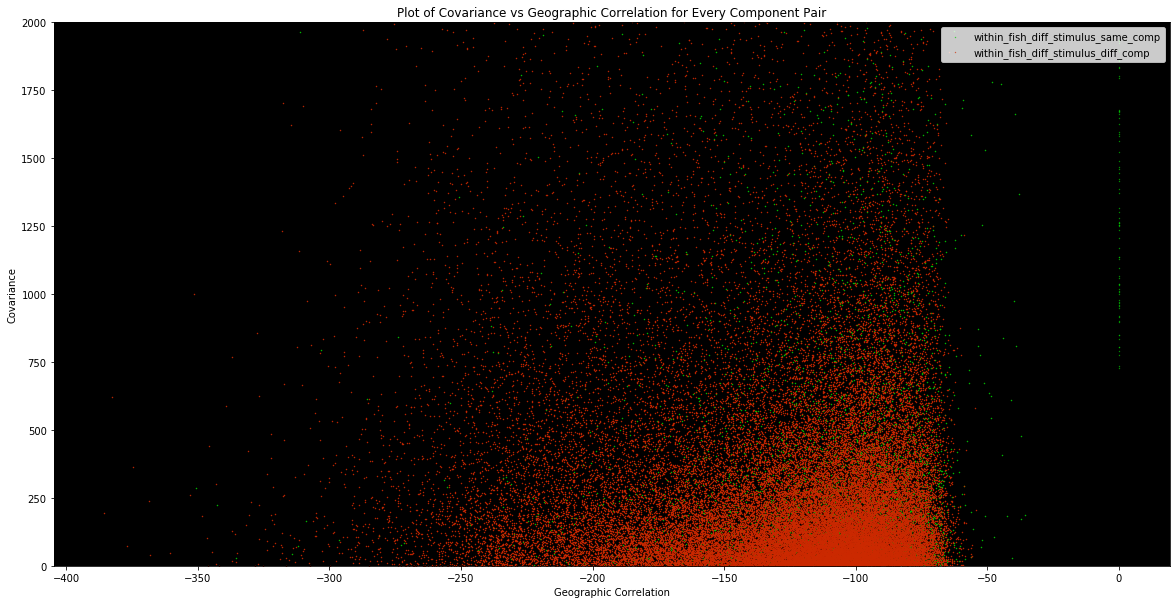

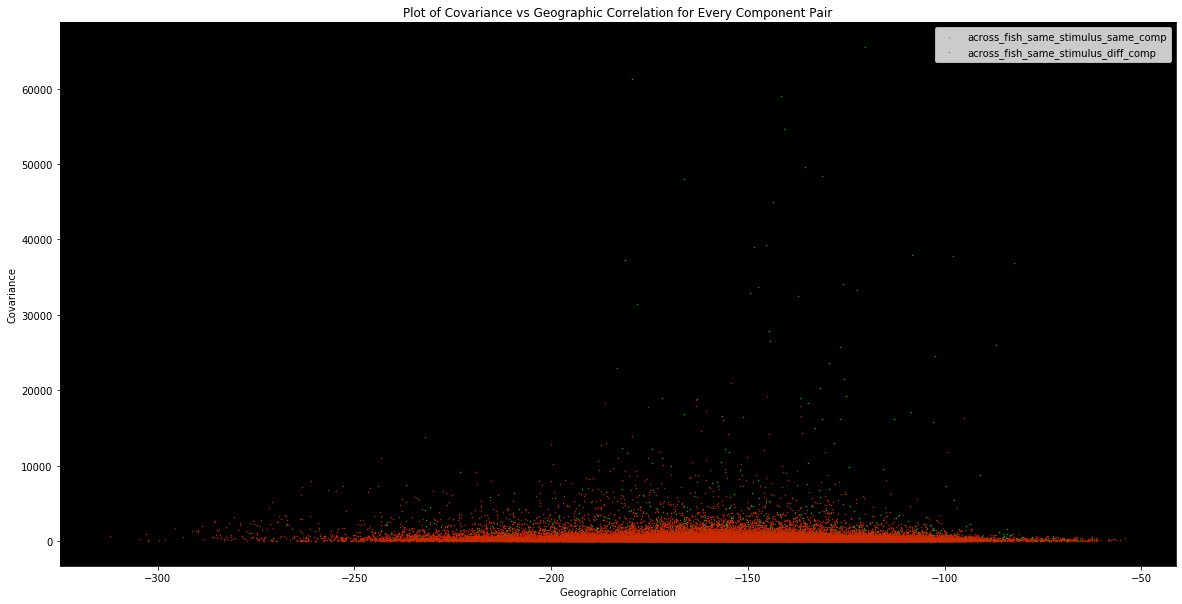

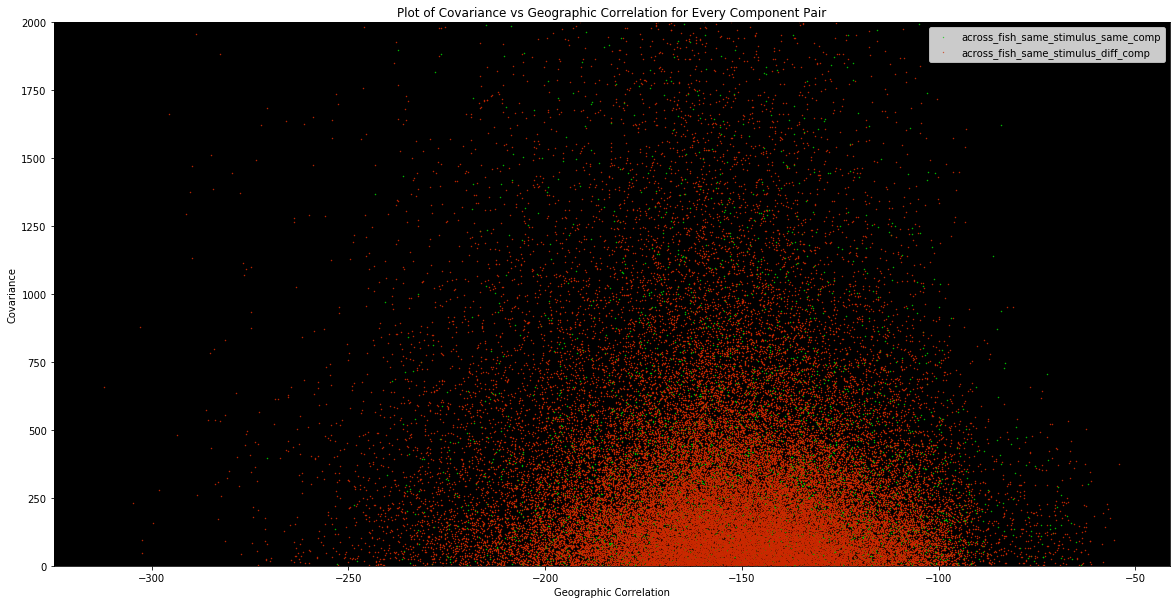

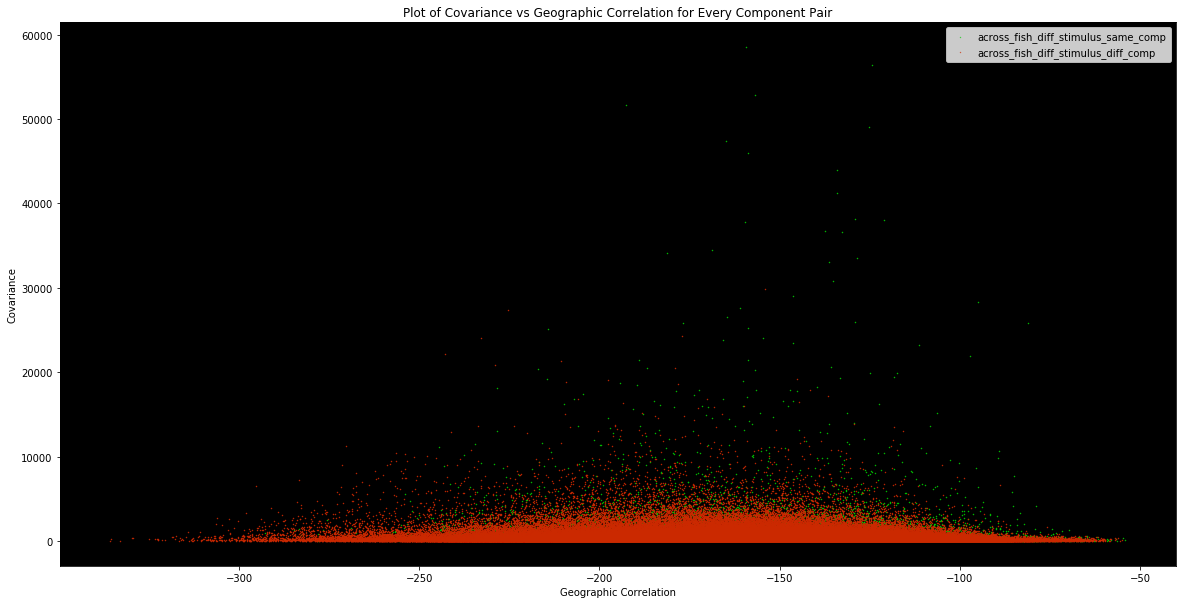

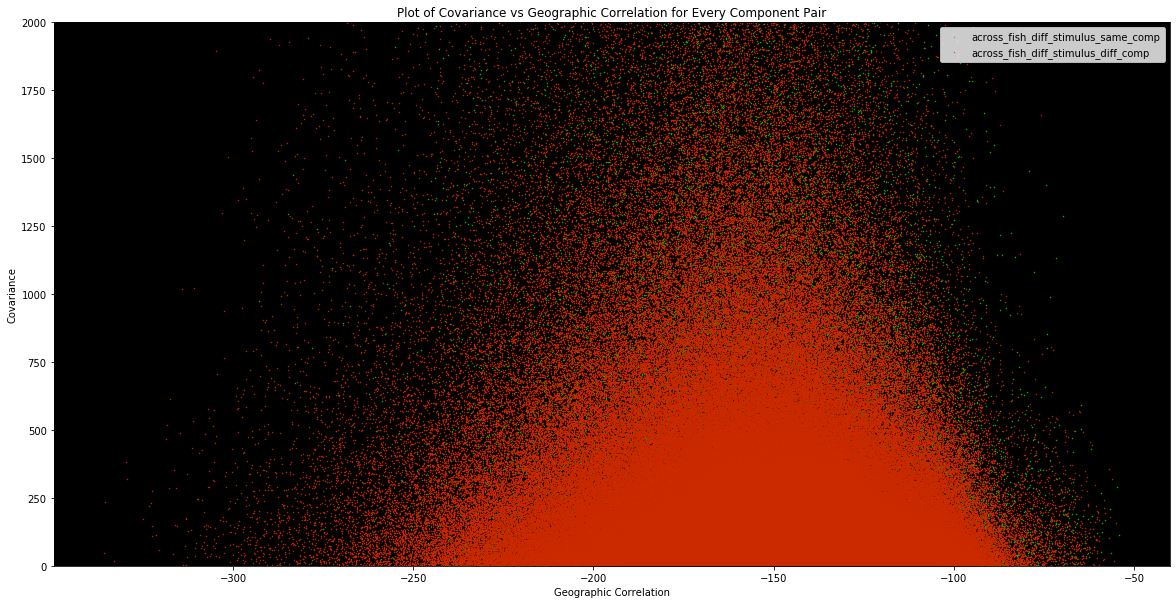

In [8]:
scatter_geo_cov([
    [within_fish_same_stimulus_same_comp.geo_corr,within_fish_same_stimulus_same_comp.covariance],
    [within_fish_same_stimulus_diff_comp.geo_corr,within_fish_same_stimulus_diff_comp.covariance]
], 2, [
    'within_fish_same_stimulus_same_comp',
    'within_fish_same_stimulus_diff_comp'
    
], 'Plot of Covariance vs Geographic Correlation for Every Component Pair')

scatter_geo_cov([
    [within_fish_diff_stimulus_same_comp.geo_corr,within_fish_diff_stimulus_same_comp.covariance],
    [within_fish_diff_stimulus_diff_comp.geo_corr,within_fish_diff_stimulus_diff_comp.covariance]
], 2, [
    'within_fish_diff_stimulus_same_comp',
    'within_fish_diff_stimulus_diff_comp'
    
], 'Plot of Covariance vs Geographic Correlation for Every Component Pair')

scatter_geo_cov([
    [across_fish_same_stimulus_same_comp.geo_corr,across_fish_same_stimulus_same_comp.covariance],
    [across_fish_same_stimulus_diff_comp.geo_corr,across_fish_same_stimulus_diff_comp.covariance]
], 2, [
    'across_fish_same_stimulus_same_comp',
    'across_fish_same_stimulus_diff_comp'
    
], 'Plot of Covariance vs Geographic Correlation for Every Component Pair')

scatter_geo_cov([
    [across_fish_diff_stimulus_same_comp.geo_corr,across_fish_diff_stimulus_same_comp.covariance],
    [across_fish_diff_stimulus_diff_comp.geo_corr,across_fish_diff_stimulus_diff_comp.covariance]
], 2, [
    'across_fish_diff_stimulus_same_comp',
    'across_fish_diff_stimulus_diff_comp'
    
], 'Plot of Covariance vs Geographic Correlation for Every Component Pair')

In [9]:
identical_components = results_df[
    (results_df.stimulus_1 == results_df.stimulus_2) & 
    (results_df.subject_1 == results_df.subject_2) &
    (results_df.component_1 == results_df.component_2)
]
within_fish_same_stimulus = results_df[
    (results_df.stimulus_1 == results_df.stimulus_2) & 
    (results_df.subject_1 == results_df.subject_2) &
    (results_df.component_1 != results_df.component_2)
]
within_fish_diff_stimulus = results_df[
    (results_df.stimulus_1 != results_df.stimulus_2) & 
    (results_df.subject_1 == results_df.subject_2)
]
across_fish_same_stimulus = results_df[
    (results_df.stimulus_1 == results_df.stimulus_2) & 
    (results_df.subject_1 != results_df.subject_2)
]
across_fish_diff_stimulus = results_df[
    (results_df.stimulus_1 != results_df.stimulus_2) & 
    (results_df.subject_1 != results_df.subject_2)
]

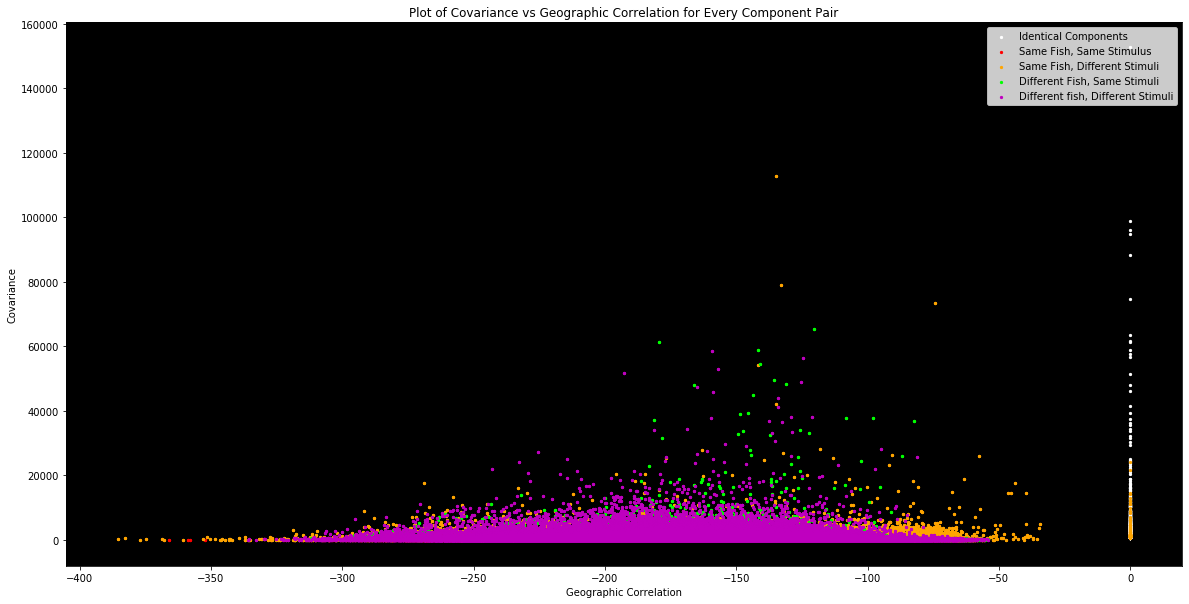

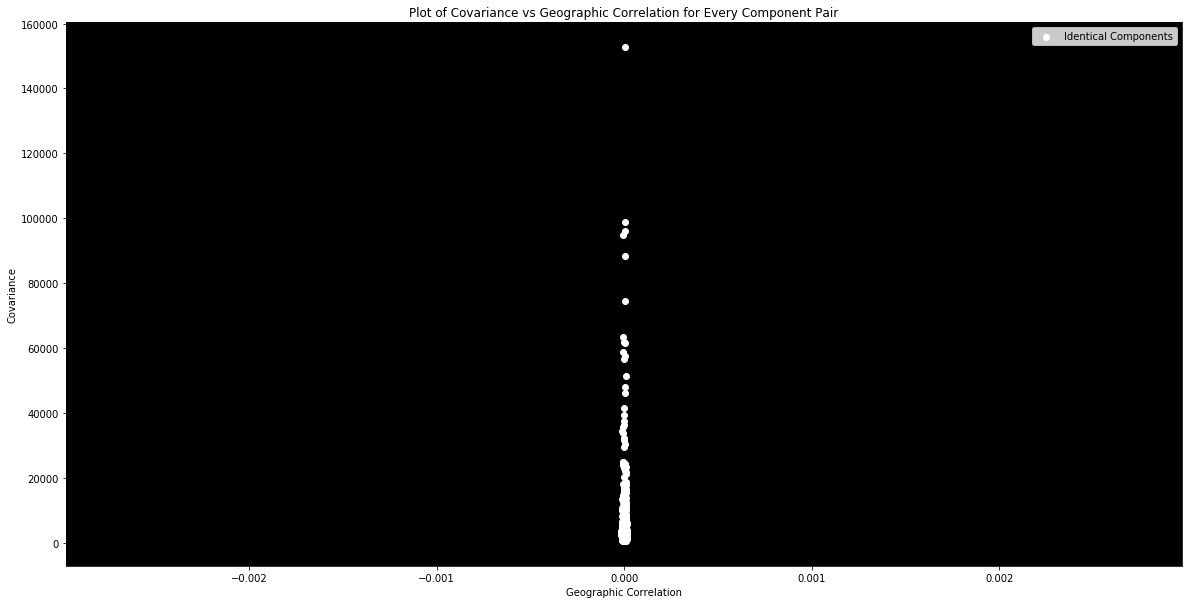

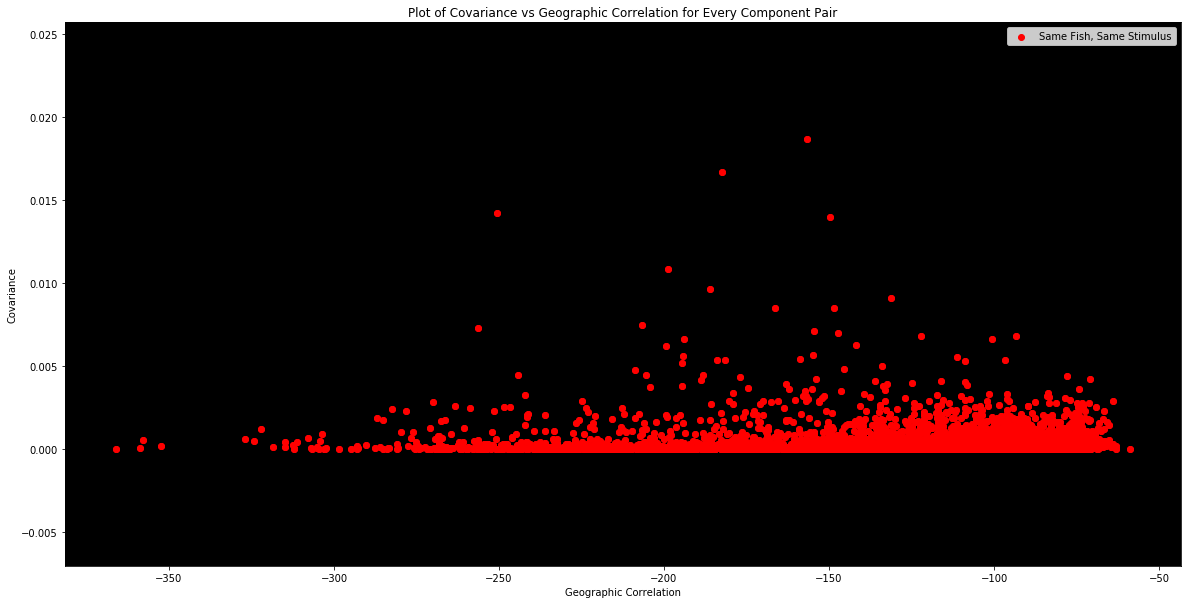

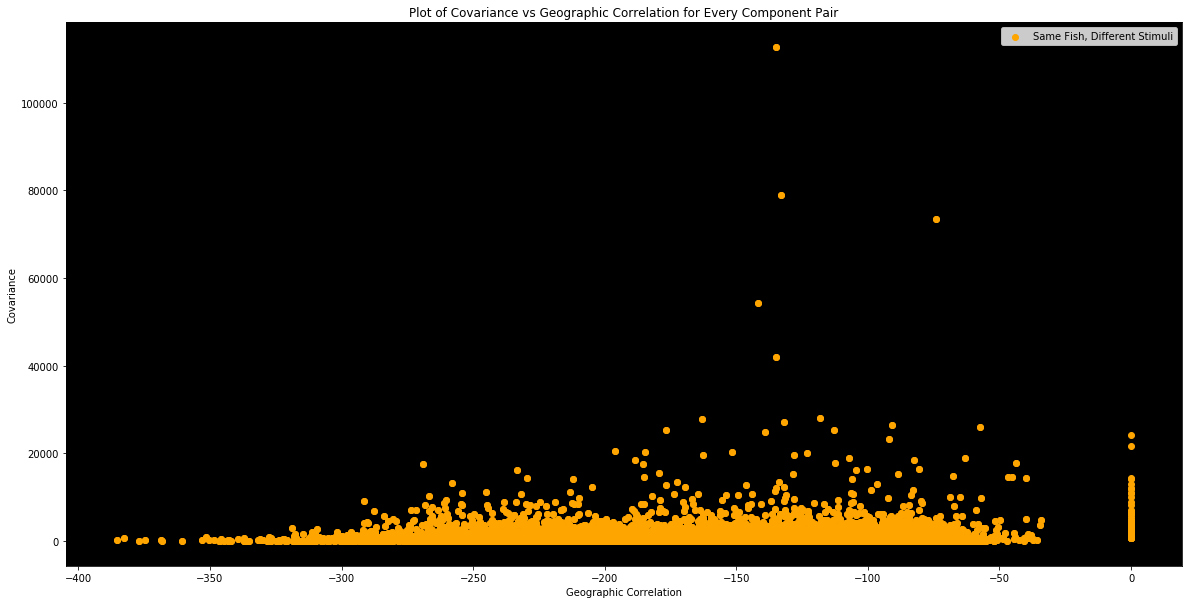

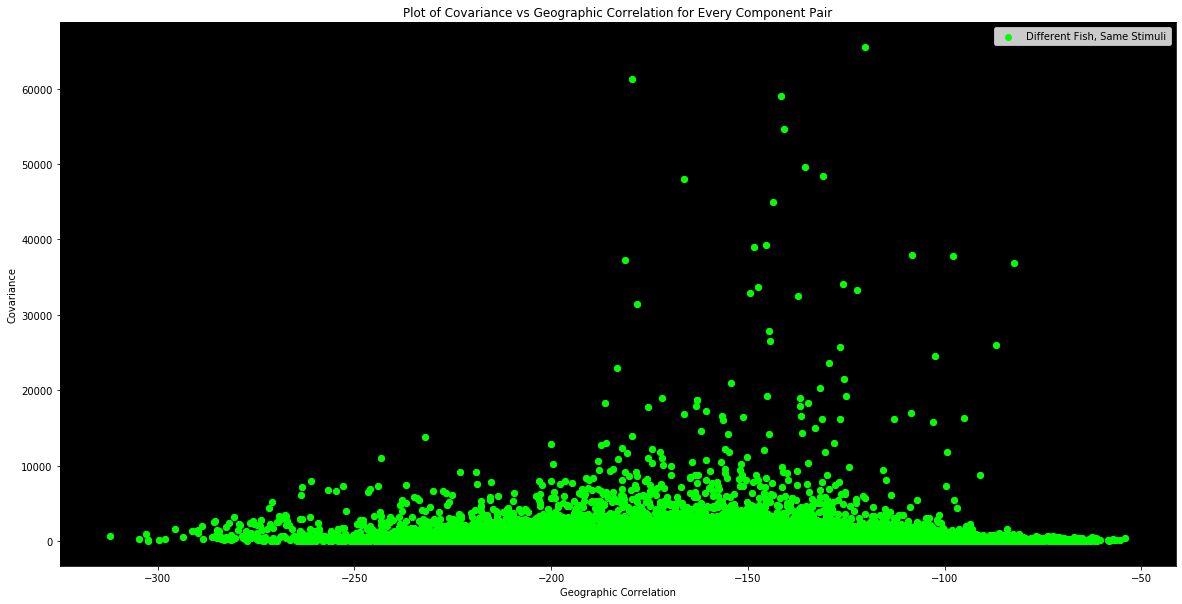

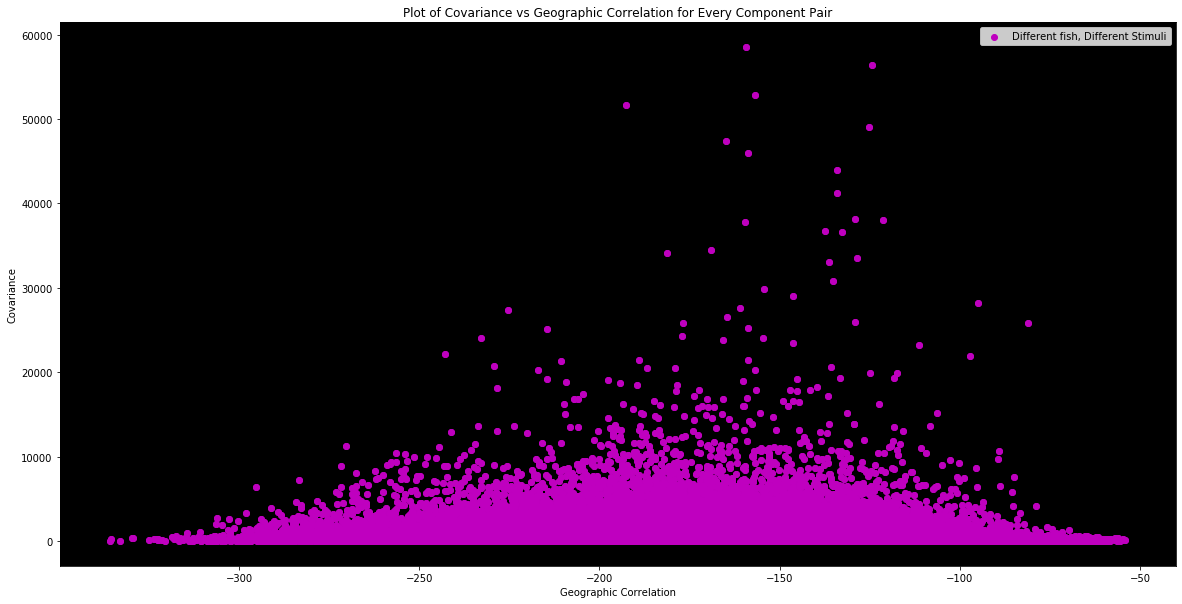

In [52]:
fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(identical_components.geo_corr, identical_components.covariance, s=5, c='white', label='Identical Components')
ax.scatter(within_fish_same_stimulus.geo_corr, within_fish_same_stimulus.covariance, s=5, c='red', label='Same Fish, Same Stimulus')
ax.scatter(within_fish_diff_stimulus.geo_corr, within_fish_diff_stimulus.covariance, s=5, c='orange', label="Same Fish, Different Stimuli")
ax.scatter(across_fish_same_stimulus.geo_corr, across_fish_same_stimulus.covariance, s=5, c='lime', label="Different Fish, Same Stimuli")
ax.scatter(across_fish_diff_stimulus.geo_corr, across_fish_diff_stimulus.covariance, s=5, c='m', label="Different fish, Different Stimuli")
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(identical_components.geo_corr, identical_components.covariance, c='white', label='Identical Components')
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(within_fish_same_stimulus.geo_corr, within_fish_same_stimulus.covariance, c='red', label='Same Fish, Same Stimulus')
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(within_fish_diff_stimulus.geo_corr, within_fish_diff_stimulus.covariance, c='orange', label="Same Fish, Different Stimuli")
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(across_fish_same_stimulus.geo_corr, across_fish_same_stimulus.covariance, c='lime', label="Different Fish, Same Stimuli")
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(across_fish_diff_stimulus.geo_corr, across_fish_diff_stimulus.covariance, c='m', label="Different fish, Different Stimuli")
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()

In [11]:
stats.spearmanr(results_df.geo_corr, results_df.covariance)

SpearmanrResult(correlation=-0.1021981039695289, pvalue=0.0)

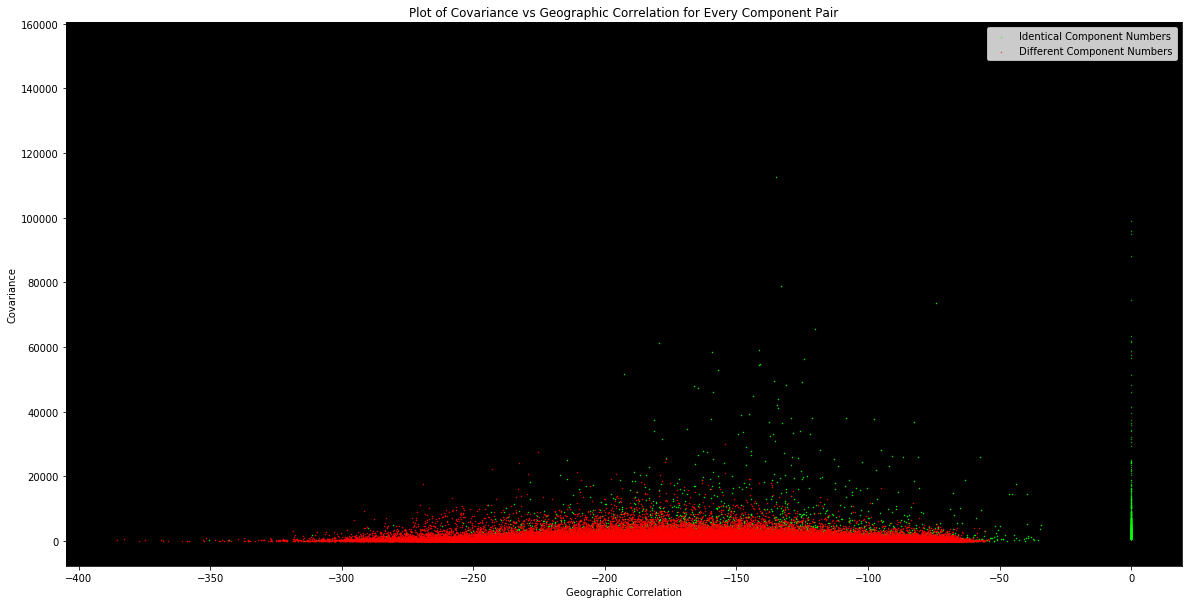

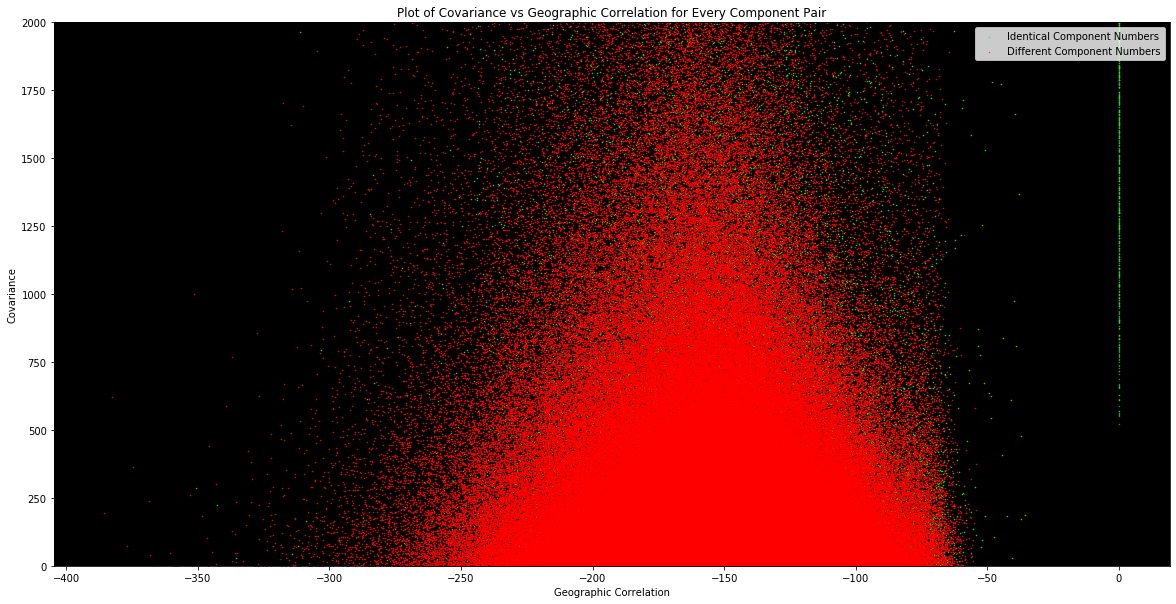

In [12]:
same_component_number = results_df[
    (results_df.component_1 == results_df.component_2)
]
diff_component_number = results_df[
    (results_df.component_1 != results_df.component_2)
]
fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(same_component_number.geo_corr, same_component_number.covariance, c='lime', s=.1, label='Identical Component Numbers')
ax.scatter(diff_component_number.geo_corr, diff_component_number.covariance, c='red', s=.1, label='Different Component Numbers')
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('black')
ax.scatter(same_component_number.geo_corr, same_component_number.covariance, c='lime', s=.1, label='Identical Component Numbers')
ax.scatter(diff_component_number.geo_corr, diff_component_number.covariance, c='red', s=.1, label='Different Component Numbers')
ax.legend(loc='upper right')
ax.set_xlabel('Geographic Correlation')
ax.set_ylabel('Covariance')
ax.set_ylim([-1,2000])
ax.set_title('Plot of Covariance vs Geographic Correlation for Every Component Pair')
plt.show()


In [13]:
grps = results_df.groupby(['subject_1','subject_2','stimulus_1','stimulus_2', 'component_1'])

In [14]:
max_ser = grps['covariance'].max()
max_ser.name = 'max_val'
median_ser = grps['covariance'].median()
median_ser.name = 'median'
sum_two_highest_points = grps['covariance'].apply(lambda grp: grp.sort_values(ascending=False)[0:2].sum())
sum_two_highest_points.name = 'sum_two_highest_points'

In [15]:
groups_df = pd.concat((pd.concat((max_ser,median_ser), axis=1), sum_two_highest_points), axis=1)
groups_df

max_val    median  \
subject_1 subject_2 stimulus_1 stimulus_2 component_1                           
subject_1 subject_1 0          0          0            41434.242847  0.000142   
                                          1            10070.285566  0.000152   
                                          2             3768.025855  0.000418   
                                          3             3314.277042  0.000300   
                                          4             2556.012240  0.000294   
...                                                             ...       ...   
subject_7 subject_7 3          3          5             2641.196601  0.000186   
                                          6             2088.961074  0.000320   
                                          7             1799.285743  0.000247   
                                          8             1707.047991  0.000144   
                                          9             1609.250207  0.000125   

                                                       sum_two_highest_points  
subject_1 subject_2 stimulus_1 stimulus_2 component_1                          
subject_1 subject_1 0          0          0                      41434.249089  
                                          1                      10070.291808  
                                          2                       3768.026962  
                                          3                       3314.278778  
                                          4                       2556.013976  
...                                                                       ...  
subject_7 subject_7 3          3          5                       2641.198464  
                                          6                       2088.961867  
                                          7                       1799.286536  
                                          8                       1707.048678  
                                          9                       1609.250894  

[134560 rows x 3 columns]

In [16]:
groups_df.dtypes

max_val                   float64
median                    float64
sum_two_highest_points    float64
dtype: object

In [17]:
groups_df['top_df_diff_norm'] = groups_df.sum_two_highest_points.sub(groups_df.max_val).div(groups_df['median'])
groups_df['sum_div_max'] = groups_df.sum_two_highest_points.sub(groups_df.max_val).div(groups_df.sum_two_highest_points)
groups_df.top_df_diff_norm.describe()

count    134560.000000
mean          2.730838
std           1.904249
min           1.044213
25%           1.795763
50%           2.281101
75%           3.077125
max         154.188809
Name: top_df_diff_norm, dtype: float64

In [18]:
groups_df.sum_div_max.describe()

count    1.345600e+05
mean     3.967519e-01
std      8.980032e-02
min      6.328229e-09
25%      3.520588e-01
50%      4.204613e-01
75%      4.653440e-01
max      4.999991e-01
Name: sum_div_max, dtype: float64

In [19]:
groups_df[(groups_df.top_df_diff_norm > 4) & (groups_df.sum_div_max > 0.4)]

max_val  \
subject_1 subject_2 stimulus_1 stimulus_2 component_1                
subject_1 subject_1 1          2          0            4061.229428   
                    2          0          0            5784.369694   
                                          2            2208.757616   
                                          3            2347.730757   
                               3          4             944.099508   
...                                                            ...   
subject_7 subject_6 2          1          1            2055.679153   
          subject_7 1          3          7            1225.651212   
                    2          3          2            3935.623393   
                    3          2          2            3773.517719   
                                          9             933.541470   

                                                            median  \
subject_1 subject_2 stimulus_1 stimulus_2 component_1                
subject_1 subject_1 1          2          0             854.029800   
                    2          0          0            1177.721955   
                                          2             421.055047   
                                          3             486.606879   
                               3          4             167.254568   
...                                                            ...   
subject_7 subject_6 2          1          1             284.063188   
          subject_7 1          3          7             227.281602   
                    2          3          2             814.525886   
                    3          2          2             776.760635   
                                          9             227.438427   

                                                       sum_two_highest_points  \
subject_1 subject_2 stimulus_1 stimulus_2 component_1                           
subject_1 subject_1 1          2          0                       7567.423958   
                    2          0          0                      10867.413123   
                                          2                       3910.387109   
                                          3                       4579.450283   
                               3          4                       1851.712739   
...                                                                       ...   
subject_7 subject_6 2          1          1                       3877.334868   
          subject_7 1          3          7                       2291.208357   
                    2          3          2                       7709.141112   
                    3          2          2                       7262.931195   
                                          9                       1849.989591   

                                                       top_df_diff_norm  \
subject_1 subject_2 stimulus_1 stimulus_2 component_1                     
subject_1 subject_1 1          2          0                    4.105471   
                    2          0          0                    4.315996   
                                          2                    4.041347   
                                          3                    4.586288   
                               3          4                    5.426538   
...                                                                 ...   
subject_7 subject_6 2          1          1                    6.412854   
          subject_7 1          3          7                    4.688268   
                    2          3          2                    4.632778   
                    3          2          2                    4.492264   
                                          9                    4.029434   

                                                       sum_div_max  
subject_1 subject_2 stimulus_1 stimulus_2 component_1               
subject_1 subject_1 1          2          0               0.463327  
